## Data Machine Learning - extended from Data Visualization Milestone
### Group 2
Members: Hongting Li, Zhiyu Pan, huijie zhang, jiayun dai

#### Initialize CSV and clean basic data


In [658]:
import pandas as pd
from pandas import read_csv

import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

In [659]:
sales = read_csv('vgsales.csv',header=0)


In [660]:
sales.dropna(how='all', axis=1, inplace=True) # Drop empty col
sales.dropna(how='all', axis=0, inplace=True) # Drop empty row
sales.head()


,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


In [661]:
sales = sales.drop(["url", "img_url", "status"], axis=1) # URL is no relevant in data analyze, and status is remain 1

In [662]:
sales.shape

(55792, 19)

In [663]:
sales.dtypes


Rank               int64
Name              object
basename          object
Genre             object
ESRB_Rating       object
Platform          object
Publisher         object
Developer         object
Critic_Score     float64
User_Score       float64
Total_Shipped    float64
Global_Sales     float64
NA_Sales         float64
PAL_Sales        float64
JP_Sales         float64
Other_Sales      float64
Year             float64
Last_Update       object
Vgchartzscore    float64
dtype: object

### Handle Missing Data
1. Sales will fill missing data as -1, as "ESRB_Rating", Score, sales and Years cannot be -1
If shows in -1, it means Invalid input
2. Apply appropriate data type

In [664]:
sales.columns
sales = sales.fillna(value=-1)
sales["Year"] = sales["Year"].astype(int)

### Creating and Transforming Data
1. In sales_score_data, need to have average score between user, critic and vg score is necessary to analyze user experience
2. In the sales_game_data, it has either total_shipped or global_sales. It needs to be combine into 1 column for total sales

In [665]:
# 1. Get avg score, if a score is -1, means invalid, will not be used in calculations
def get_avg_score(row):
    CS = row["Critic_Score"]
    US =  row["User_Score"]
    VS = row["Vgchartzscore"]
    init_lst = [CS, US, VS]

    while -1.0 in init_lst:
        init_lst.remove(-1.0)
    if len(init_lst) == 0:
        return -1
    return round(sum(init_lst) / len(init_lst) , 2)
    # As All scores are invalid

        

sales["Avg_Score"] = sales.apply(get_avg_score, axis=1)
sales.head()


    


,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,Vgchartzscore,Avg_Score
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,-1.0,82.86,-1.0,-1.0,-1.0,-1.0,-1.0,2006,-1,-1.0,7.70
1,2,Super Mario Bros.,super-mario-bros,Platform,-1,NES,Nintendo,Nintendo EAD,10.0,-1.0,40.24,-1.0,-1.0,-1.0,-1.0,-1.0,1985,-1,-1.0,10.00
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,-1.0,-1.0,-1.0,-1.0,-1.0,2008,11th Apr 18,8.7,8.67
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,-1,PC,PUBG Corporation,PUBG Corporation,-1.0,-1.0,36.60,-1.0,-1.0,-1.0,-1.0,-1.0,2017,13th Nov 18,-1.0,-1.00
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,-1.0,-1.0,-1.0,-1.0,-1.0,2009,-1,8.8,8.53


In [666]:
# 2. Combine Total Sales from Global Sales and Total Shipped

# sales_game_data.loc[sales_game_data['Global_Sales'] != -1.0 , "Total_Sales"]
# sales_game_data.loc[sales_game_data['Total_Shipped'] != -1.0 , "Total_Sales"]

conditions = [sales.Global_Sales.eq(-1), sales.Total_Shipped.eq(-1)]
choices = [sales.Total_Shipped, sales.Global_Sales]
sales["Total_Sales"] = np.select(conditions, choices)



sales.head()


,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,...,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,Vgchartzscore,Avg_Score,Total_Sales
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,2006,-1,-1.0,7.70,82.86
1,2,Super Mario Bros.,super-mario-bros,Platform,-1,NES,Nintendo,Nintendo EAD,10.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,1985,-1,-1.0,10.00,40.24
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,...,-1.0,-1.0,-1.0,-1.0,-1.0,2008,11th Apr 18,8.7,8.67,37.14
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,-1,PC,PUBG Corporation,PUBG Corporation,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,2017,13th Nov 18,-1.0,-1.00,36.60
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,...,-1.0,-1.0,-1.0,-1.0,-1.0,2009,-1,8.8,8.53,33.09


In [667]:
sales.shape

(55792, 21)

### Filtering Data and Sort Data
1. In sales, remove sales with 0
2. In sales, filter games from 2005-2010. 2011-2015, 2016-present for seperate analyze
3. Seperate sales only data to analyze sales in the market, sort data by total_sales
4. Seperate score only data to analyze score in user experience, sort data by average_score

In [668]:
# Drop rows with Total_sale = 0 - Invalid Data
sales = sales.drop(sales[sales.Total_Sales == 0].index)
sales.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,...,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,Vgchartzscore,Avg_Score,Total_Sales
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,2006,-1,-1.0,7.70,82.86
1,2,Super Mario Bros.,super-mario-bros,Platform,-1,NES,Nintendo,Nintendo EAD,10.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,1985,-1,-1.0,10.00,40.24
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,...,-1.0,-1.0,-1.0,-1.0,-1.0,2008,11th Apr 18,8.7,8.67,37.14
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,-1,PC,PUBG Corporation,PUBG Corporation,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,2017,13th Nov 18,-1.0,-1.00,36.60
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,...,-1.0,-1.0,-1.0,-1.0,-1.0,2009,-1,8.8,8.53,33.09


In [669]:
# Filter data from 2016 to present
release_over_2012_sales_df = sales[sales["Year"] >= 2012]
release_2000_2011_sales_df = sales[(sales["Year"] >= 2000) & (2011 >= sales["Year"])]
release_1990_2001_sales_df = sales[(sales["Year"] >= 1990) & (2001 >= sales["Year"])]
release_over_2012_sales_df.head()



,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,...,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,Vgchartzscore,Avg_Score,Total_Sales
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,-1,PC,PUBG Corporation,PUBG Corporation,-1.0,-1.0,...,-1.00,-1.00,-1.00,-1.00,-1.00,2017,13th Nov 18,-1.0,-1.0,36.60
19,20,Grand Theft Auto V,grand-theft-auto-v,Action,M,PS3,Rockstar Games,Rockstar North,9.4,-1.0,...,20.32,6.37,9.85,0.99,3.12,2013,-1,-1.0,9.4,20.32
20,21,Grand Theft Auto V,grand-theft-auto-v,Action,M,PS4,Rockstar Games,Rockstar North,9.7,-1.0,...,19.39,6.06,9.71,0.60,3.02,2014,03rd Jan 18,-1.0,9.7,19.39
28,29,Pokemon X/Y,pokmon-x,Role-Playing,E,3DS,Nintendo,Game Freak,8.9,9.7,...,-1.00,-1.00,-1.00,-1.00,-1.00,2013,06th Jan 18,-1.0,9.3,16.37
31,32,Pokemon Sun/Moon,pokmon-sun,Role-Playing,E,3DS,Nintendo,Game Freak,9.0,-1.0,...,-1.00,-1.00,-1.00,-1.00,-1.00,2016,03rd Aug 18,-1.0,9.0,16.14


In [670]:
release_over_2012_sales_df.shape

(12853, 21)

#### To evaluate market for new games, it is best to consider data from the past 10 years

In [671]:
# 3. Seperate sales data and sort by sales
sales_game_data = release_over_2012_sales_df[release_over_2012_sales_df['Total_Shipped'].ne(-1) | release_over_2012_sales_df['Global_Sales'].ne(-1)] # Drop rows that Total_shipped and Global_Sales Data are both missing
sales_game_data = sales_game_data.drop(["Critic_Score", "User_Score", "Vgchartzscore", "Avg_Score"], axis=1)
sales_game_data = sales_game_data.sort_values(by=["Total_Sales"], ascending=False)

sales_game_data.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,Total_Sales
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,-1,PC,PUBG Corporation,PUBG Corporation,36.60,-1.00,-1.00,-1.00,-1.00,-1.00,2017,13th Nov 18,36.60
19,20,Grand Theft Auto V,grand-theft-auto-v,Action,M,PS3,Rockstar Games,Rockstar North,-1.00,20.32,6.37,9.85,0.99,3.12,2013,-1,20.32
20,21,Grand Theft Auto V,grand-theft-auto-v,Action,M,PS4,Rockstar Games,Rockstar North,-1.00,19.39,6.06,9.71,0.60,3.02,2014,03rd Jan 18,19.39
28,29,Pokemon X/Y,pokmon-x,Role-Playing,E,3DS,Nintendo,Game Freak,16.37,-1.00,-1.00,-1.00,-1.00,-1.00,2013,06th Jan 18,16.37
31,32,Pokemon Sun/Moon,pokmon-sun,Role-Playing,E,3DS,Nintendo,Game Freak,16.14,-1.00,-1.00,-1.00,-1.00,-1.00,2016,03rd Aug 18,16.14


In [672]:
sales_game_data.shape

(5187, 17)

In [673]:
# 4. Seperate score only and sort by avg_score
sales_score_data = release_over_2012_sales_df[release_over_2012_sales_df['Critic_Score'].ne(-1) | release_over_2012_sales_df['User_Score'].ne(-1) |  release_over_2012_sales_df['Vgchartzscore'].ne(-1)]  # Collect rows with critics_score or user_score or Vgachrtzscor
sales_score_data = sales_score_data.drop(["Total_Shipped", "Global_Sales", "NA_Sales", "PAL_Sales", "JP_Sales", "Other_Sales", "Total_Sales"], axis=1)
sales_score_data = sales_score_data.sort_values(by=["Avg_Score"], ascending=False)
sales_score_data.head()


,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Year,Last_Update,Vgchartzscore,Avg_Score
53885,53886,Hollow Knight,hollow-knight,Action-Adventure,E10,NS,Team Cherry,Team Cherry,-1.0,10.0,2018,01st Dec 18,-1.0,10.0
53545,53546,Dust: An Elysian Tail,dust-an-elysian-tail,Platform,-1,NS,Humble Hearts,Humble Hearts,-1.0,10.0,2018,26th Sep 18,-1.0,10.0
15916,15917,Okami HD,okami-hd,Action,-1,NS,Capcom,Capcom,-1.0,10.0,2018,09th Mar 18,-1.0,10.0
989,990,Dragon Quest XI: Echoes of an Elusive Age,dragon-quest-xi-echoes-of-an-elusive-age,Role-Playing,T,PS4,Square Enix,Square Enix,10.0,-1.0,2018,11th Sep 18,-1.0,10.0
53703,53704,Forza Horizon 4,forza-horizon-4,Racing,-1,PC,Microsoft Studios,Playground Games,10.0,-1.0,2018,11th Jun 18,-1.0,10.0


In [674]:
sales_score_data.shape
# The score data has only 900, may result in unreliable conclusion


(915, 14)

### Outlier, Grouping, Aggregating and Sorting
- As creating new games, the data set from 2012 to present will be used
- Need to get significant data from sales data set, and abandon outlier

1. Group Platform to understand which platform are popular to use
2. Group ESRB to understand what age has the best chances to succeed by sales and score
3. Group By genre to understand what kind of game is most welcomed
4. Find correlation between sales and scores

In [675]:
sales_game_data.describe() # Find Q1 and Q3

,Rank,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Total_Sales
count,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000
mean,10823.559668,-0.673883,0.184496,-0.351452,-0.416136,-0.515013,-0.362809,2015.092732,0.510613
std,6007.163456,1.232291,1.130055,0.770883,0.774385,0.543614,0.541275,2.034147,1.422268
min,4.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2012.000000,0.010000
25%,5650.000000,-1.000000,0.010000,-1.000000,-1.000000,-1.000000,-1.000000,2013.000000,0.030000
50%,11420.000000,-1.000000,0.060000,0.010000,-1.000000,-1.000000,0.000000,2015.000000,0.120000
75%,16294.000000,-1.000000,0.250000,0.100000,0.070000,0.030000,0.020000,2017.000000,0.390000
max,19861.000000,36.600000,20.320000,9.060000,9.850000,2.690000,3.120000,2020.000000,36.600000


In [676]:
Q1 = 0.030000
Q3 = 0.390000
IQR = Q3 - Q1

UF = Q3 + 1.5*IQR
LF = Q1 - 1.5*IQR

print(UF)
print(LF)

0.93
-0.51


In [677]:
# Identify outlier
upper_outlier = [sales_game_data['Total_Sales'] > UF]
lower_outlier = [sales_game_data['Total_Sales'] < LF]

# Keep data without outlier
sales_no_outliers = sales_game_data[sales_game_data['Total_Sales'] < UF]
sales_no_outliers = sales_no_outliers[sales_no_outliers['Total_Sales'] > LF]

sales_game_data = sales_no_outliers
sales_game_data.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,Total_Sales
2618,2619,Overwatch,overwatch,Shooter,T,PC,Blizzard Entertainment,Blizzard Entertainment,-1.0,0.92,0.37,0.48,-1.00,0.07,2016,24th Mar 18,0.92
2622,2623,NCAA Football 14,ncaa-football-14,Sports,E,PS3,EA Sports,EA Tiburon,-1.0,0.92,0.75,-1.00,-1.00,0.17,2013,31st Jan 18,0.92
2627,2628,Far Cry 3,far-cry-3,Shooter,-1,PC,Ubisoft,Ubisoft Montreal,-1.0,0.92,0.22,0.64,-1.00,0.06,2012,-1,0.92
2628,2629,SSX,ssx,Sports,E,PS3,EA Sports,EA Canada,-1.0,0.92,0.35,0.42,0.02,0.13,2012,-1,0.92
2630,2631,Xenoblade Chronicles,xenoblade-chronicles,Role-Playing,T,Wii,Nintendo,Monolith Soft,-1.0,0.92,0.43,0.25,0.16,0.07,2012,-1,0.92


In [678]:
# 1. Group by Platform
pf_group_sale = sales_game_data.groupby("Platform")
pf_group_score = sales_score_data.groupby("Platform")
# Focus on PS4, PC, Xone and NS for modern video games
pf_name_lst = ["PC", "Play Station 4", "XBoxOne", "Nintendo Switch"]



In [679]:
# 1.1 Sales
pf_lst_sale = [round(pf_group_sale.get_group("PC")["Total_Sales"].sum(), 2), 
    round(pf_group_sale.get_group("PS4")["Total_Sales"].sum(), 2), 
    round(pf_group_sale.get_group("XOne")["Total_Sales"].sum(), 2), 
    round(pf_group_sale.get_group("NS")["Total_Sales"].sum(), 2)]

print("Total Sales for each platform")
pr_lst = [(pf_name_lst[x], pf_lst_sale[x]) for x in range(len(pf_name_lst))] # Sort sales by decending order
pr_lst.sort(key=lambda tup: tup[1], reverse=True)
for tu in pr_lst: print("{}: {}m".format(tu[0], tu[1]))

Total Sales for each platform
PC: 177.1m
Play Station 4: 133.7m
XBoxOne: 83.93m
Nintendo Switch: 35.11m


In [680]:
# 1.2 Score
pf_lst_score = [round(pf_group_score.get_group("PC")["Avg_Score"].mean(), 2), 
    round(pf_group_score.get_group("PS4")["Avg_Score"].mean(), 2), 
    round(pf_group_score.get_group("XOne")["Avg_Score"].mean(), 2), 
    round(pf_group_score.get_group("NS")["Avg_Score"].mean(), 2)]

print("Average score for each platform")
pr_lst = [(pf_name_lst[x], pf_lst_score[x]) for x in range(len(pf_name_lst))]
pr_lst.sort(key=lambda tup: tup[1], reverse=True) # Sort scores by decending order
for tu in pr_lst: print("{}: {}".format(tu[0], tu[1]))

Average score for each platform
Play Station 4: 7.68
PC: 7.66
XBoxOne: 7.61
Nintendo Switch: 7.37


In [681]:
# 2 Group ESRB
ESRB_over_2012_sale = sales_game_data.groupby("ESRB_Rating")
ESRB_over_2012_score = sales_score_data.groupby("ESRB_Rating")

ESRB_type_sales = list(ESRB_over_2012_sale.groups.keys())
ESRB_type_score = list(ESRB_over_2012_score.groups.keys())

while -1 in ESRB_type_sales: ESRB_type_sales.remove(-1) # Remove invalid rating
while -1 in ESRB_type_score: ESRB_type_score.remove(-1)


In [682]:
# 2.1 Group ESRB by sales
ESRB_sales = [round(ESRB_over_2012_sale.get_group(x)["Total_Sales"].sum(), 2) for x in ESRB_type_sales]
print("Total Sale for each ESRB rating")
pr_lst = [(ESRB_type_sales[x], ESRB_sales[x]) for x in range(len(ESRB_type_sales))] # Sort sales by decending order
pr_lst.sort(key=lambda tup: tup[1], reverse=True)
for tu in pr_lst: print("{}: {}m".format(tu[0], tu[1]))

Total Sale for each ESRB rating
M: 158.32m
T: 141.99m
E10: 130.86m
E: 108.77m
RP: 5.07m
EC: 0.2m


In [683]:
# 2.2 Group ESRB by score
ESRB_score = [round(ESRB_over_2012_score.get_group(x)["Avg_Score"].mean(), 2) for x in ESRB_type_score]
print("Average Score for each ESRB rating")
pr_lst = [(ESRB_type_score[x], ESRB_score[x]) for x in range(len(ESRB_type_score))]
pr_lst.sort(key=lambda tup: tup[1], reverse=True) # Sort scores by decending order
for tu in pr_lst: print("{}: {}".format(tu[0], tu[1]))

Average Score for each ESRB rating
M: 7.76
T: 7.54
E: 7.51
E10: 7.5
RP: 6.88


In [684]:
# 3 Group by Genere
genre_over_2012_sales = sales_game_data.groupby("Genre")
genre_over_2012_scores = sales_score_data.groupby("Genre")

genre_type_sales = list(genre_over_2012_sales.groups.keys())
genre_type_score = list(genre_over_2012_scores.groups.keys())

while -1 in genre_type_sales: genre_type_sales.remove(-1) # Remove invalid rating
while -1 in genre_type_score: genre_type_score.remove(-1) # Remove invalid rating


In [685]:
# 3.1 Group genre by sales
genre_sales = [round(genre_over_2012_sales.get_group(x)["Total_Sales"].sum(), 2) for x in genre_type_sales]
print("Total Sale for each genre")
pr_lst = [(genre_type_sales[x], genre_sales[x]) for x in range(len(genre_type_sales))] # Sort sales by decending order
pr_lst.sort(key=lambda tup: tup[1], reverse=True)
for tu in pr_lst: print("{}: {}m".format(tu[0], tu[1]))

Total Sale for each genre
Action: 140.73m
Role-Playing: 96.32m
Sports: 76.62m
Shooter: 72.46m
Misc: 72.42m
Action-Adventure: 60.79m
Adventure: 45.81m
Platform: 45.14m
Racing: 36.61m
Simulation: 36.02m
Fighting: 33.93m
Music: 29.67m
Strategy: 21.7m
Puzzle: 16.69m
Party: 5.4m
Visual Novel: 4.86m
MMO: 4.09m
Sandbox: 0.83m
Board Game: 0.31m
Education: 0.2m


In [686]:
# 3.2 Group genre by avg scores
gnere_score = [round(genre_over_2012_scores.get_group(x)["Avg_Score"].mean(), 2) for x in genre_type_score]
print("Average Score for each genre")
pr_lst = [(genre_type_score[x], gnere_score[x]) for x in range(len(genre_type_score))]
pr_lst.sort(key=lambda tup: tup[1], reverse=True) # Sort scores by decending order
for tu in pr_lst: print("{}: {}".format(tu[0], tu[1]))

Average Score for each genre
Sandbox: 9.2
Music: 8.06
MMO: 8.05
Strategy: 7.95
Puzzle: 7.75
Visual Novel: 7.75
Shooter: 7.7
Sports: 7.61
Adventure: 7.55
Platform: 7.54
Action-Adventure: 7.51
Education: 7.5
Role-Playing: 7.5
Fighting: 7.45
Action: 7.4
Racing: 7.39
Simulation: 7.34
Misc: 7.18
Party: 6.11
Board Game: 5.3


In [687]:
sales.corr()["Avg_Score"]

Rank            -0.292748
Critic_Score     0.971435
User_Score       0.231642
Total_Shipped    0.160428
Global_Sales     0.307484
NA_Sales         0.333747
PAL_Sales        0.334438
JP_Sales         0.131458
Other_Sales      0.301310
Year             0.032762
Vgchartzscore    0.335148
Avg_Score        1.000000
Total_Sales      0.333781
Name: Avg_Score, dtype: float64

In [688]:
sales.corr()["Total_Sales"]

Rank            -0.590216
Critic_Score     0.342552
User_Score       0.162722
Total_Shipped    0.731659
Global_Sales     0.637501
NA_Sales         0.550746
PAL_Sales        0.534121
JP_Sales         0.310081
Other_Sales      0.499389
Year             0.064358
Vgchartzscore    0.140191
Avg_Score        0.333781
Total_Sales      1.000000
Name: Total_Sales, dtype: float64

 ## Data Visualization


In [689]:
# Import Matplolib
import matplotlib.pyplot as plt
import seaborn as sns

### Subplot (2 x 2) & Line chart
1. Num of games each year, View trends
2. Average Sales each year, View trends, which year has most sale and analyze the reason
3. Avg Score of each year on every games

In [690]:

year_group = sales.groupby("Year")

# Drop rows that Total_shipped and Global_Sales Data are both missing.groupby("Year")
sales_year_group = sales[sales['Total_Sales'].ne(-1)].groupby("Year")
score_year_group = sales[sales['Avg_Score'].ne(-1)].groupby("Year")




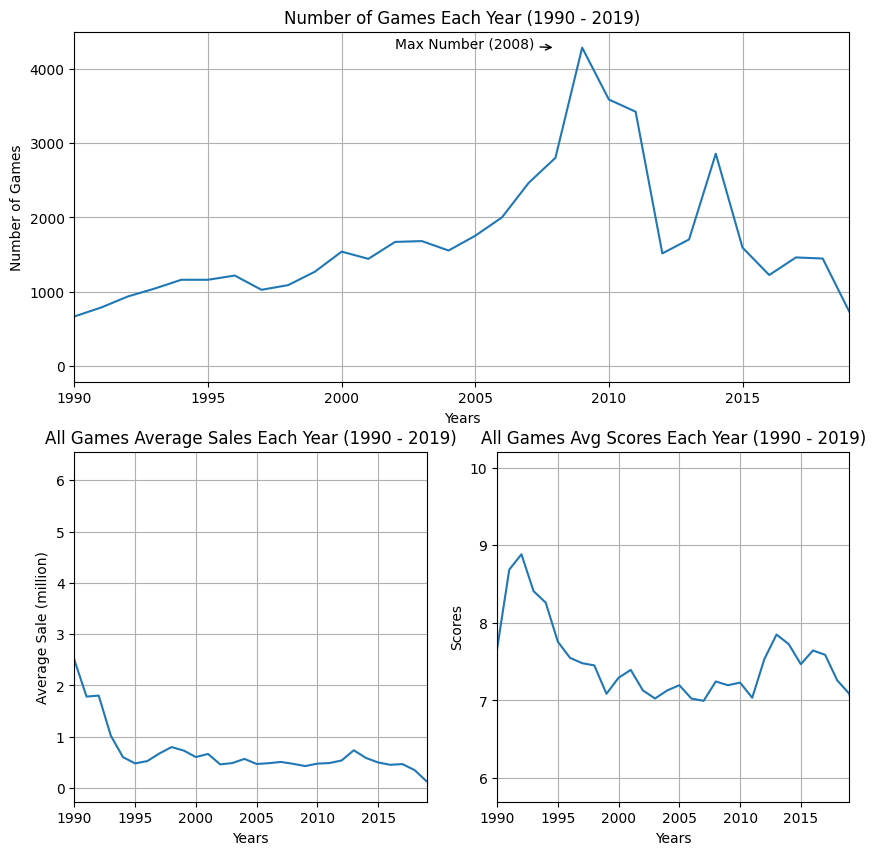

In [691]:
# Create an empty figure of subplot
fig = plt.figure()
plt.tight_layout()
# Increase size to prevernt text overlap
fig.set_figheight(10)
fig.set_figwidth(10)

ax1 = fig.add_subplot(2,1,1) # Number of games each year
ax2 = fig.add_subplot(2,2,3)
ax3 = fig.add_subplot(2,2,4)

year_group["Year"].count()

ax1.plot(year_group["Year"].count())
ax1.set_xlim(1990, 2019)
ax1.title.set_text("Number of Games Each Year (1990 - 2019)")
ax1.xaxis.set_label_text("Years")
ax1.yaxis.set_label_text("Number of Games")
ax1.grid()
y1 = year_group["Year"].count().max()

ax1.annotate("Max Number (2008)",
            xy=(2008, y1), xycoords='data',
            xytext=(2008-6, y1), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
             )


ax2.sharex(ax1) # Using year as x

ax2.plot(sales_year_group["Total_Sales"].mean())
ax2.title.set_text("All Games Average Sales Each Year (1990 - 2019)")
ax2.xaxis.set_label_text("Years")
ax2.yaxis.set_label_text("Average Sale (million)")
ax2.grid()

ax3.sharex(ax1) # Using year as x

ax3.plot(score_year_group["Avg_Score"].mean())
ax3.title.set_text("All Games Avg Scores Each Year (1990 - 2019)")
ax3.xaxis.set_label_text("Years")
ax3.yaxis.set_label_text("Scores")
ax3.grid()

# plt.savefig("General Score and Sales Subplot")

plt.show()

### Bar Chart
- The following are the games over year 2012 dataset
1. Group By Platform, view PS, PC, Switch and xbox sales and score.
2. Group By ESRB, view each ESRB's sale and score
3. Group By Genre, view each Genre's sale and score 


(7.0, 8.0)

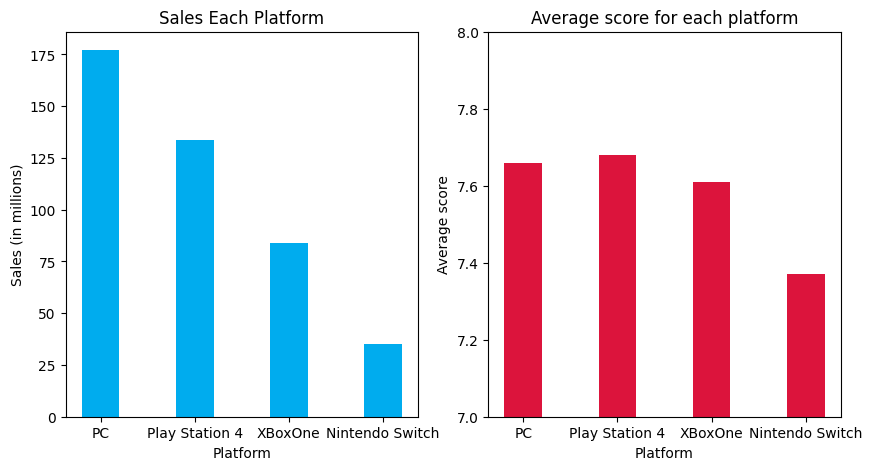

In [692]:
# 1. Group by Platform
# Create an empty figure of subplot
fig = plt.figure()
plt.tight_layout()
# Increase size to prevernt text overlap
fig.set_figheight(5)
fig.set_figwidth(10)

ax1 = fig.add_subplot(1, 2,1) # Number of games each year
ax2 = fig.add_subplot(1, 2,2)

ax1.bar(pf_name_lst, pf_lst_sale, width= 0.4, color='#00acee')
ax1.title.set_text("Sales Each Platform")
ax1.xaxis.set_label_text("Platform")
ax1.yaxis.set_label_text("Sales (in millions)")



ax2.bar(pf_name_lst, pf_lst_score, width= 0.4, color='crimson')
ax2.title.set_text("Average score for each platform")
ax2.xaxis.set_label_text("Platform")
ax2.yaxis.set_label_text("Average score")
ax2.set_ylim(7, 8)

# plt.savefig("Platform Bar Subplot")

(7.0, 8.0)

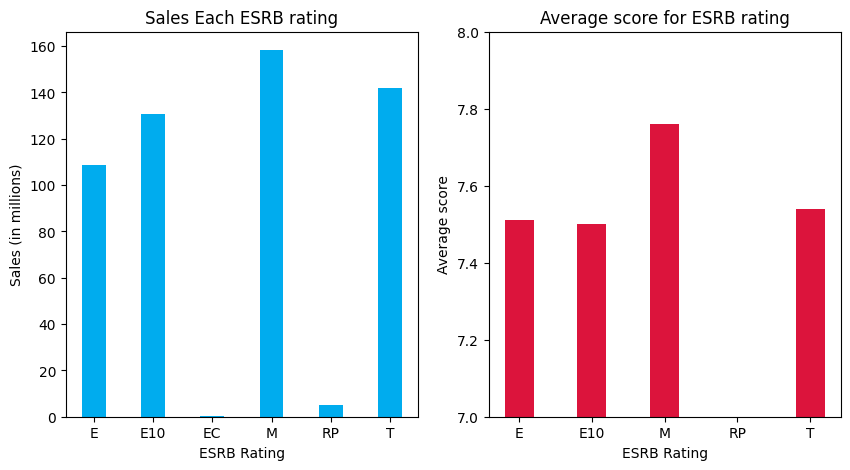

In [693]:
# 2. Group by ESRB
# Create an empty figure of subplot
fig = plt.figure()
plt.tight_layout()
# Increase size to prevernt text overlap
fig.set_figheight(5)
fig.set_figwidth(10)

ax1 = fig.add_subplot(1, 2,1) # Number of games each year
ax2 = fig.add_subplot(1, 2,2)

ax1.bar(ESRB_type_sales, ESRB_sales, width= 0.4, color='#00acee')
ax1.title.set_text("Sales Each ESRB rating")
ax1.xaxis.set_label_text("ESRB Rating")
ax1.yaxis.set_label_text("Sales (in millions)")



ax2.bar(ESRB_type_score, ESRB_score, width= 0.4, color='crimson')
ax2.title.set_text("Average score for ESRB rating")
ax2.xaxis.set_label_text("ESRB Rating")
ax2.yaxis.set_label_text("Average score")
ax2.set_ylim(7, 8)

# plt.savefig("ESRB Bar Subplot")

(7.0, 8.0)

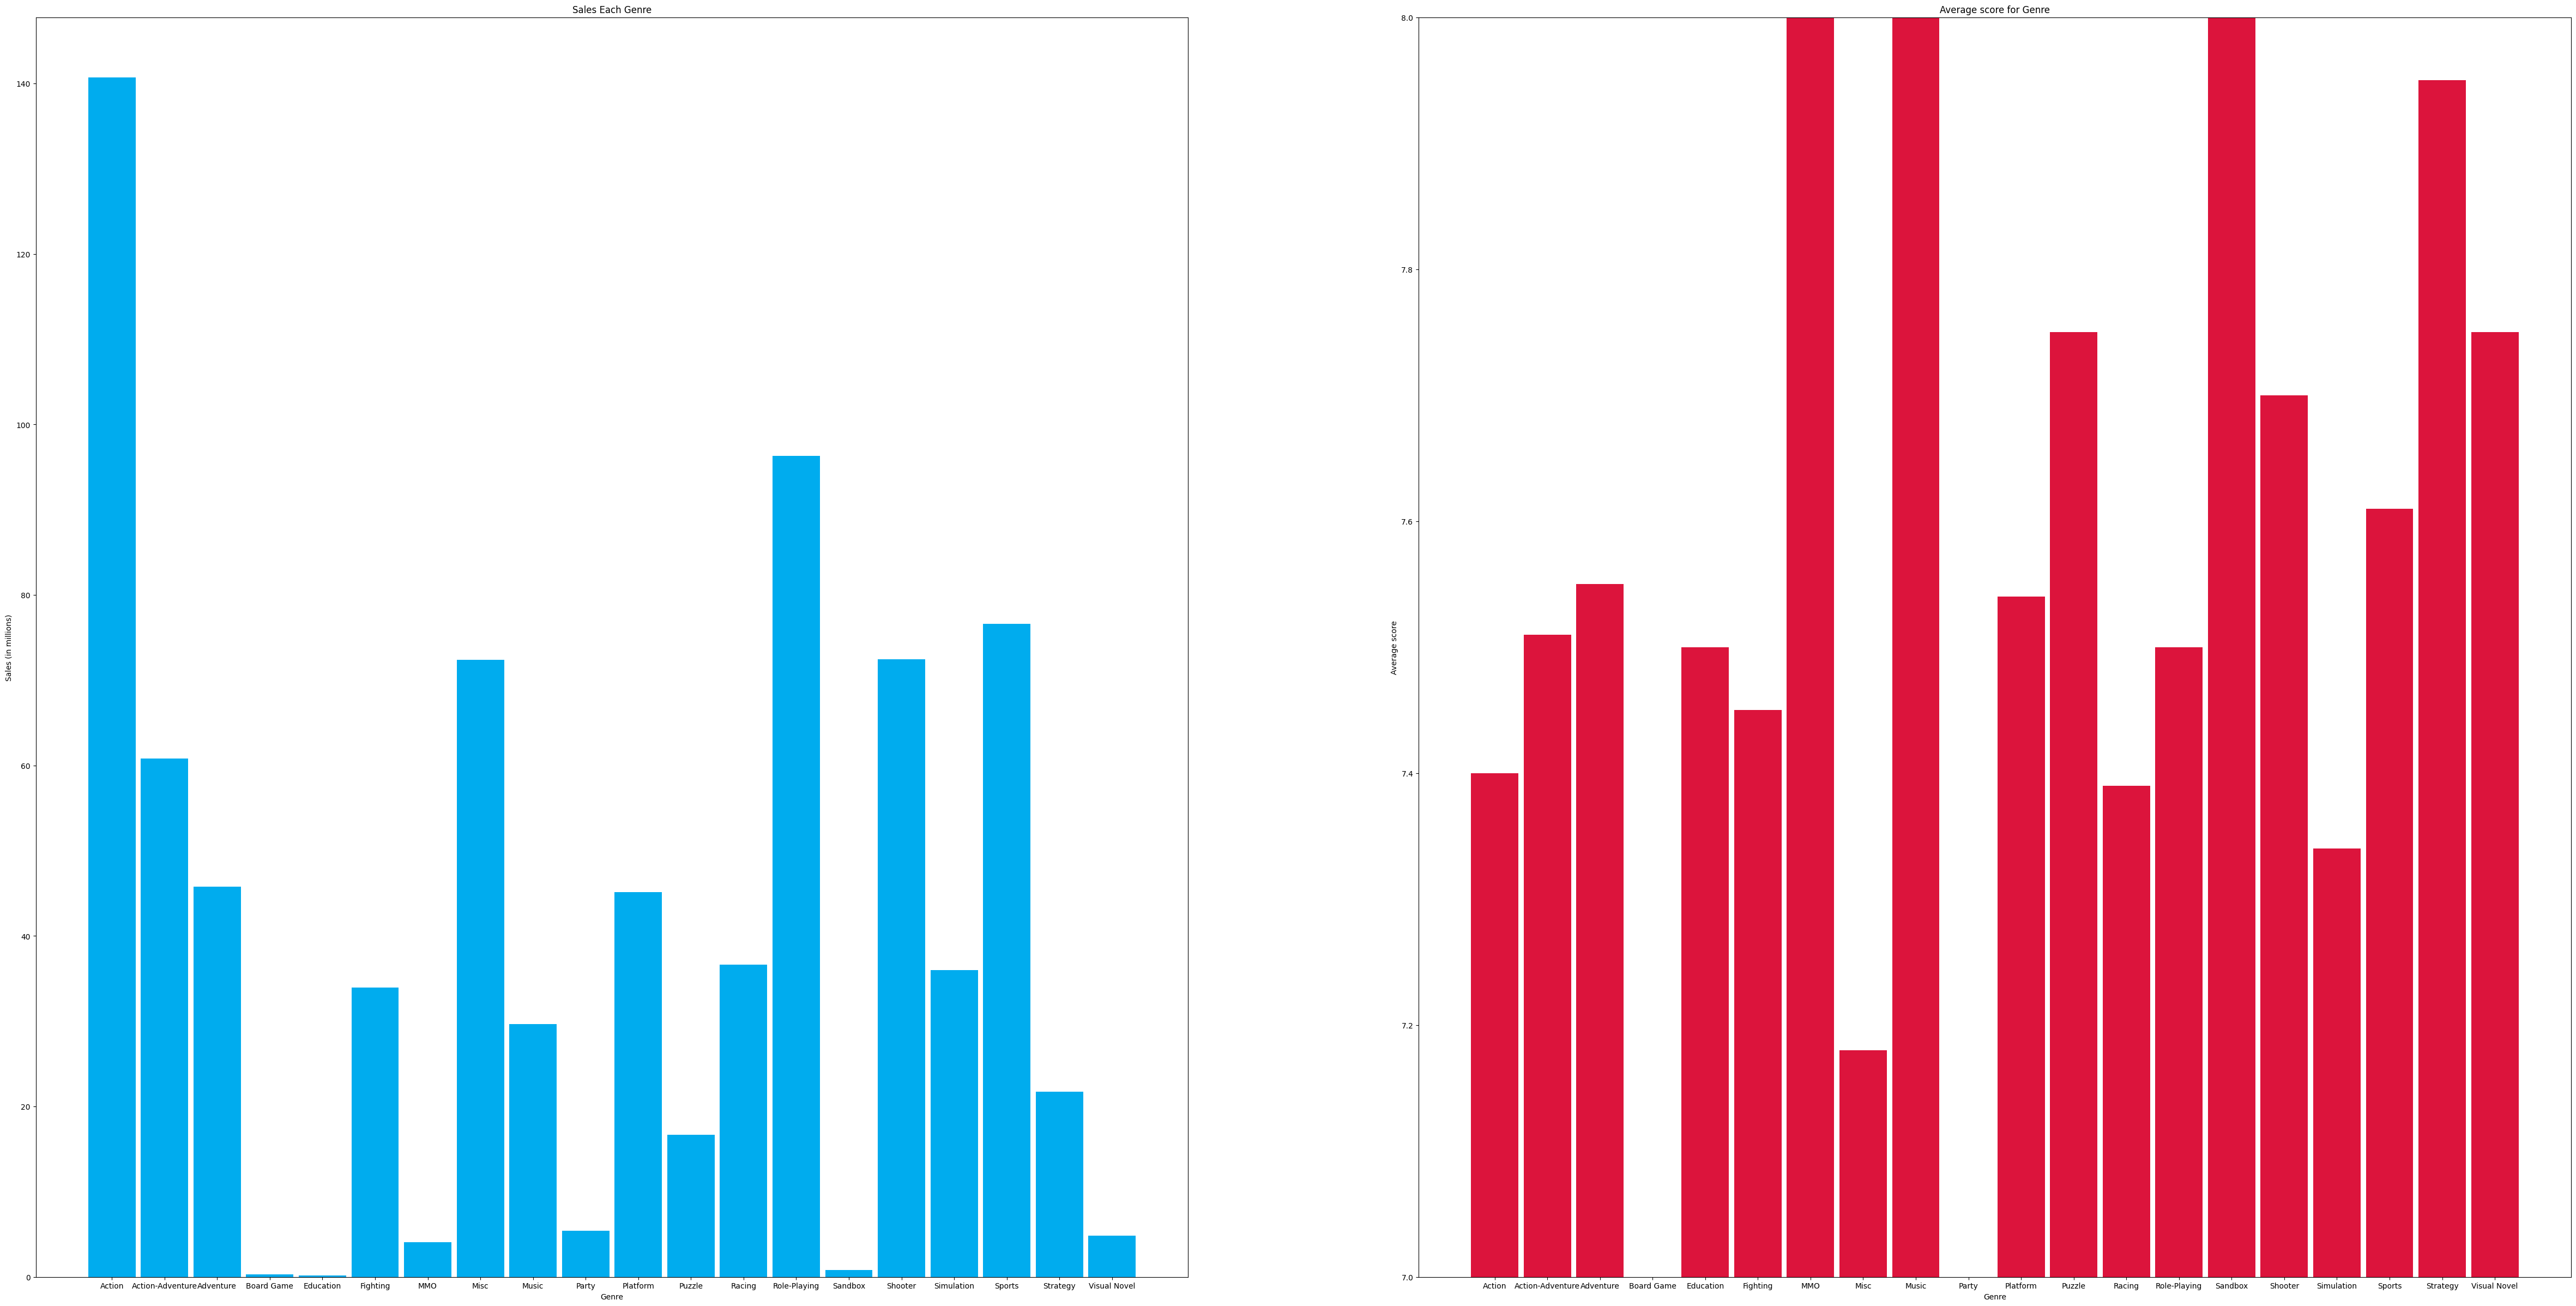

In [694]:
# 3. Group by ESRB
# Create an empty figure of subplot
fig = plt.figure()
plt.tight_layout()
# Increase size to prevernt text overlap
fig.set_figheight(30)
fig.set_figwidth(60)

ax1 = fig.add_subplot(1, 2,1) # Number of games each year
ax2 = fig.add_subplot(1, 2,2)

ax1.bar(genre_type_sales, genre_sales, width= 0.9, color='#00acee')
ax1.title.set_text("Sales Each Genre")
ax1.xaxis.set_label_text("Genre")
ax1.yaxis.set_label_text("Sales (in millions)")



ax2.bar(genre_type_score, gnere_score, width= 0.9, color='crimson')
ax2.title.set_text("Average score for Genre")
ax2.xaxis.set_label_text("Genre")
ax2.yaxis.set_label_text("Average score")
ax2.set_ylim(7, 8)

# plt.savefig("Genre Bar Subplot")

### Histogram
1. Sales over year 2012. See majority games sales and decide our goal
2. Score over year 2012. View the major scores is and set our expectation

Text(0, 0.5, 'Number of Games')

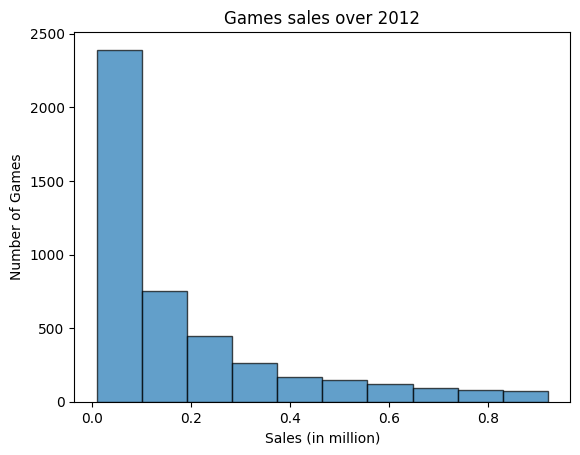

In [695]:
# 1. Sales 
plt.hist(sales_game_data["Total_Sales"], bins=10, alpha = 0.7, edgecolor='black')
plt.title("Games sales over 2012")
plt.xlabel("Sales (in million)")
plt.ylabel("Number of Games")

# plt.savefig("Games sales over 2012")

Text(0, 0.5, 'Number of Games')

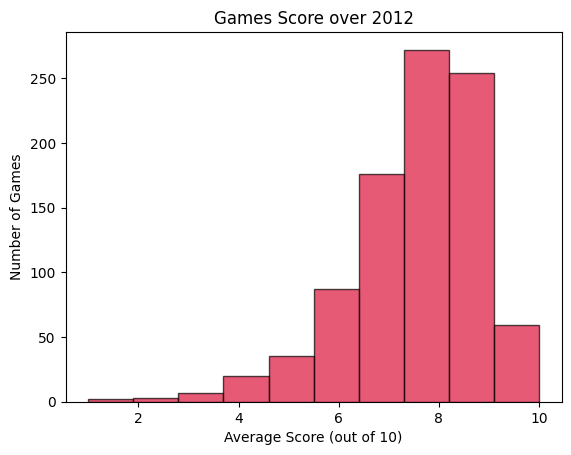

In [696]:
# 2. Score
plt.hist(sales_score_data["Avg_Score"], bins=10, alpha = 0.7, edgecolor='black', color='crimson')
plt.title("Games Score over 2012")
plt.xlabel("Average Score (out of 10)")
plt.ylabel("Number of Games")

# plt.savefig("Games Score over 2012")

### Scatter Plot
- Plot between sales and score

Text(7, 30, 'Positive Correlation')

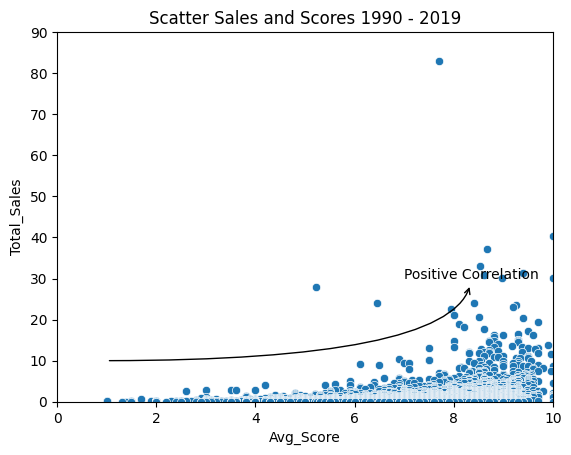

In [697]:
sns.scatterplot(x = "Avg_Score", y = "Total_Sales", data = sales)
# sns.scatterplot(x = "Year", y = "Avg_Score", data = sales)
plt.xlim(0, 10)
plt.ylim(0, 90)
plt.title("Scatter Sales and Scores 1990 - 2019")
plt.annotate("Positive Correlation",
            xy=(1, 10), xycoords='data',
            xytext=(7, 30), textcoords='data',
            arrowprops=dict(arrowstyle="<-",
                            connectionstyle="angle3"),
            )
# plt.savefig("Scatter Sales and Scores 1990 - 2019")


### Box Plot
1. Score Box plot on all games
2. Sales Box plot on Total Sales, NA, JP, PAL and other Sales for comparison.

([<matplotlib.axis.XTick at 0x1a494285480>], [Text(1, 0, 'Games')])

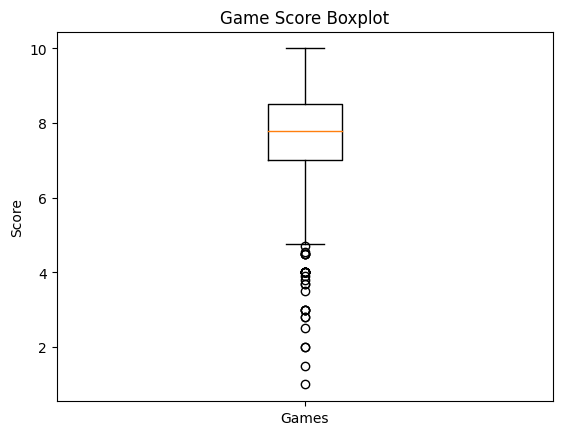

In [698]:
plt.boxplot(sales_score_data["Avg_Score"])
plt.title("Game Score Boxplot")
plt.ylabel("Score")
plt.xticks([1], ["Games"])
# plt.savefig("Game Score Boxplot")

([<matplotlib.axis.XTick at 0x1a498acf220>,
 [Text(1, 0, 'Total'),
  Text(2, 0, 'NA'),
  Text(3, 0, 'PAL'),
  Text(4, 0, 'JP'),
  Text(5, 0, 'Other')])

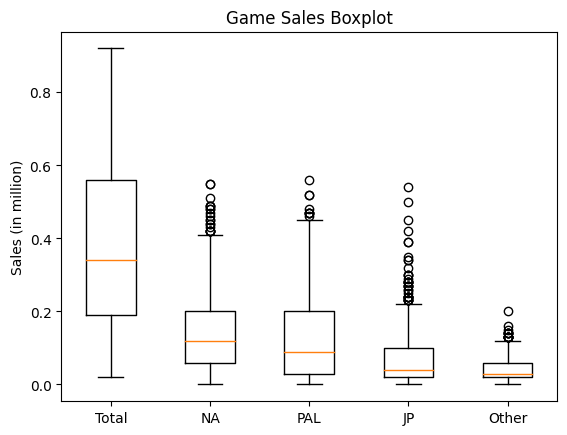

In [699]:
filter_sales_game_data = sales_game_data.drop(sales_game_data[sales_game_data.NA_Sales == -1].index)
filter_sales_game_data = filter_sales_game_data.drop(filter_sales_game_data[filter_sales_game_data.PAL_Sales == -1].index)
filter_sales_game_data = filter_sales_game_data.drop(filter_sales_game_data[filter_sales_game_data.JP_Sales == -1].index)
filter_sales_game_data = filter_sales_game_data.drop(filter_sales_game_data[filter_sales_game_data.Other_Sales == -1].index)

sale_data_lst = [filter_sales_game_data["Total_Sales"], filter_sales_game_data["NA_Sales"], \
    filter_sales_game_data["PAL_Sales"], filter_sales_game_data["JP_Sales"], filter_sales_game_data["Other_Sales"]]

plt.boxplot(sale_data_lst)
plt.title("Game Sales Boxplot")
plt.ylabel("Sales (in million)")
plt.xticks([1, 2, 3, 4, 5], ['Total', 'NA', 'PAL', 'JP', 'Other'])
# plt.savefig("Game Sales Boxplot")

### Correlation Matrix

In [700]:
from pandas.plotting import scatter_matrix
# scatter_matrix(sales, figsize=(50 ,50))
# plt.title("Sales Scatter Matrix")
# plt.savefig("Sales Scatter Matrix")


In [701]:
plt.close()

## Machine Learning


In [702]:
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### Preparing Data
- Drop unnecessary cols
- Numeric encode catagloty value
- Convert responce variable to Bool

In [703]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54412 entries, 0 to 55791
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           54412 non-null  int64  
 1   Name           54412 non-null  object 
 2   basename       54412 non-null  object 
 3   Genre          54412 non-null  object 
 4   ESRB_Rating    54412 non-null  object 
 5   Platform       54412 non-null  object 
 6   Publisher      54412 non-null  object 
 7   Developer      54412 non-null  object 
 8   Critic_Score   54412 non-null  float64
 9   User_Score     54412 non-null  float64
 10  Total_Shipped  54412 non-null  float64
 11  Global_Sales   54412 non-null  float64
 12  NA_Sales       54412 non-null  float64
 13  PAL_Sales      54412 non-null  float64
 14  JP_Sales       54412 non-null  float64
 15  Other_Sales    54412 non-null  float64
 16  Year           54412 non-null  int32  
 17  Last_Update    54412 non-null  object 
 18  Vgchar

In [704]:
ml_sales = sales
ml_sales = ml_sales.drop(["Rank", "Name", "basename", "Publisher", "Developer", "Last_Update", "Total_Shipped", "Global_Sales", "NA_Sales", \
    "PAL_Sales", "JP_Sales", "Vgchartzscore", "Other_Sales", "Critic_Score", "User_Score"], axis=1)
ml_sales.head()


,Genre,ESRB_Rating,Platform,Year,Avg_Score,Total_Sales
0,Sports,E,Wii,2006,7.70,82.86
1,Platform,-1,NES,1985,10.00,40.24
2,Racing,E,Wii,2008,8.67,37.14
3,Shooter,-1,PC,2017,-1.00,36.60
4,Sports,E,Wii,2009,8.53,33.09


In [705]:
ml_sales.shape

(54412, 6)

In [706]:
# Need to apply numeric encode for Genre, ESRB and Platform
# First generate dictionary to keep track corresponding code. 
# Genre
col_genre = ml_sales['Genre'].astype('category')
dict_genre = dict(enumerate(col_genre.cat.categories))
print("Genre \n", dict_genre)

# ESRB 
col_ESRB = ml_sales['ESRB_Rating'].astype('category')
dict_ESRB = dict(enumerate(col_ESRB.cat.categories))
print("ESRB \n", dict_ESRB)

# Platform
col_platform = ml_sales['Platform'].astype('category')
dict_platform = dict(enumerate(col_platform.cat.categories))
print("platform \n", dict_platform)
ml_sales.head()

Genre 
 {0: 'Action', 1: 'Action-Adventure', 2: 'Adventure', 3: 'Board Game', 4: 'Education', 5: 'Fighting', 6: 'MMO', 7: 'Misc', 8: 'Music', 9: 'Party', 10: 'Platform', 11: 'Puzzle', 12: 'Racing', 13: 'Role-Playing', 14: 'Sandbox', 15: 'Shooter', 16: 'Simulation', 17: 'Sports', 18: 'Strategy', 19: 'Visual Novel'}
ESRB 
 {0: -1, 1: 'AO', 2: 'E', 3: 'E10', 4: 'EC', 5: 'KA', 6: 'M', 7: 'RP', 8: 'T'}
ESRB 
 {0: '2600', 1: '3DO', 2: '3DS', 3: '5200', 4: '7800', 5: 'ACPC', 6: 'AJ', 7: 'AST', 8: 'Aco', 9: 'Amig', 10: 'And', 11: 'ApII', 12: 'Arc', 13: 'BBCM', 14: 'BRW', 15: 'C128', 16: 'C64', 17: 'CD32', 18: 'CDi', 19: 'DC', 20: 'DS', 21: 'DSi', 22: 'DSiW', 23: 'FMT', 24: 'GB', 25: 'GBA', 26: 'GBC', 27: 'GC', 28: 'GEN', 29: 'GG', 30: 'GIZ', 31: 'Int', 32: 'Linux', 33: 'Lynx', 34: 'MS', 35: 'MSD', 36: 'MSX', 37: 'Mob', 38: 'N64', 39: 'NES', 40: 'NG', 41: 'NGage', 42: 'NS', 43: 'OSX', 44: 'Ouya', 45: 'PC', 46: 'PCE', 47: 'PCFX', 48: 'PS', 49: 'PS2', 50: 'PS3', 51: 'PS4', 52: 'PSN', 53: 'PSP', 5

,Genre,ESRB_Rating,Platform,Year,Avg_Score,Total_Sales
0,Sports,E,Wii,2006,7.70,82.86
1,Platform,-1,NES,1985,10.00,40.24
2,Racing,E,Wii,2008,8.67,37.14
3,Shooter,-1,PC,2017,-1.00,36.60
4,Sports,E,Wii,2009,8.53,33.09


In [707]:
# Convert all to Numeric Value
ml_sales['Genre'] = ml_sales.Genre.astype('category').cat.codes
ml_sales['ESRB_Rating'] = ml_sales.ESRB_Rating.astype('category').cat.codes
ml_sales['Platform'] = ml_sales.Platform.astype('category').cat.codes



ml_sales.head()

,Genre,ESRB_Rating,Platform,Year,Avg_Score,Total_Sales
0,17,2,64,2006,7.70,82.86
1,10,0,39,1985,10.00,40.24
2,12,2,64,2008,8.67,37.14
3,15,0,45,2017,-1.00,36.60
4,17,2,64,2009,8.53,33.09


In [708]:
# Drop col that has -1  in Sales and Score
ml_sales = ml_sales.drop(ml_sales[ml_sales.Total_Sales == -1].index)
ml_sales = ml_sales.drop(ml_sales[ml_sales.Avg_Score == -1].index)


### Prepare Data - Sales Greater Than Medium

In [709]:
# Add medium as Response Var
m = ml_sales['Total_Sales'].median()
print(m)
new_col = ml_sales['Total_Sales'].map(lambda x: 'True' if x >= m else 'False')
ml_sales['is_greater_medium_sale'] = new_col
ml_sales.shape
ml_sales.tail(10)

0.4


,Genre,ESRB_Rating,Platform,Year,Avg_Score,Total_Sales,is_greater_medium_sale
19732,17,2,25,2006,6.6,0.01,False
19759,7,0,53,2009,5.9,0.01,False
19767,0,6,45,2006,7.1,0.01,False
19768,7,2,42,2018,8.5,0.01,False
19790,5,8,69,2008,8.4,0.01,False
19792,15,8,45,2003,7.0,0.01,False
19794,0,2,25,2006,6.0,0.01,False
19800,11,2,25,2006,6.7,0.01,False
19812,16,8,45,2010,7.0,0.01,False
19816,11,0,25,2006,7.0,0.01,False


In [710]:
# Classfiy Total Sales
array = ml_sales.values
print(array)
# features = predictor/independent/explanatory variables
X = array[:,0:5]
print(X)
# target variable = dependent/response variable
y = array[:,6]
print(y)

[[17 2 64 ... 7.7 82.86 'True']
 [10 0 39 ... 10.0 40.24 'True']
 [12 2 64 ... 8.67 37.14 'True']
 ...
 [11 2 25 ... 6.7 0.01 'False']
 [16 8 45 ... 7.0 0.01 'False']
 [11 0 25 ... 7.0 0.01 'False']]
[[17 2 64 2006 7.7]
 [10 0 39 1985 10.0]
 [12 2 64 2008 8.67]
 ...
 [11 2 25 2006 6.7]
 [16 8 45 2010 7.0]
 [11 0 25 2006 7.0]]
['True' 'True' 'True' ... 'False' 'False' 'False']


In [711]:
# Split off test dataset
# 1/2 of the data will be used for testing
test_size = 0.5
seed = 7
# select 1/2 randomly and split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=test_size, random_state=seed)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[17 2 25 2006 7.0]
 [15 8 50 2008 8.6]
 [5 8 50 2009 8.4]
 ...
 [5 6 49 2002 8.2]
 [5 8 50 2008 7.8]
 [15 8 20 2006 7.8]]
['False' 'True' 'True' ... 'True' 'True' 'False']
[[16 8 45 2006 6.9]
 [1 8 2 2012 7.0]
 [12 2 64 2011 7.0]
 ...
 [18 6 49 2006 5.5]
 [18 3 45 2009 7.9]
 [15 6 67 2010 9.3]]
['False' 'False' 'False' ... 'False' 'False' 'True']


### Using Models - Sales Greater Than Medium

In [712]:
# Algorithms
models = []
models.append(('LR', LogisticRegression(solver='sag', max_iter=300000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [713]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
# define how to split off validation data
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
# train the model
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.643983 (0.033648)
LDA: 0.642739 (0.036147)
KNN: 0.631120 (0.021031)
CART: 0.638589 (0.025876)
NB: 0.634855 (0.038075)
SVM: 0.504979 (0.026572)


### Model Evaluation - Sales Greater Than Medium

[array([0.66390041, 0.60580913, 0.6846473 , 0.63900415, 0.68049793,
       0.67634855, 0.59751037, 0.64315353, 0.65975104, 0.58921162]), array([0.65560166, 0.62655602, 0.68879668, 0.62655602, 0.66804979,
       0.69294606, 0.593361  , 0.63900415, 0.65975104, 0.57676349]), array([0.67634855, 0.6473029 , 0.60995851, 0.63070539, 0.60995851,
       0.6473029 , 0.63485477, 0.63070539, 0.62240664, 0.60165975]), array([0.63900415, 0.60995851, 0.64315353, 0.63900415, 0.63485477,
       0.66390041, 0.66390041, 0.60165975, 0.6846473 , 0.60580913]), array([0.63485477, 0.61825726, 0.69294606, 0.63900415, 0.6473029 ,
       0.68049793, 0.56846473, 0.6473029 , 0.6473029 , 0.57261411]), array([0.5186722 , 0.50207469, 0.51452282, 0.52282158, 0.45228216,
       0.50622407, 0.54356846, 0.51037344, 0.46058091, 0.5186722 ])]


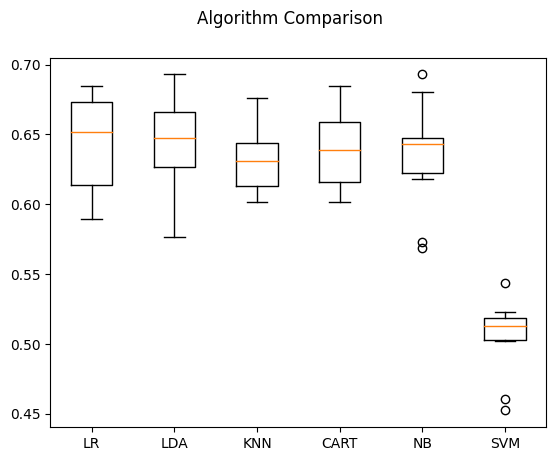

In [714]:
# Compare Algorithms
print(results)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [715]:
# Make predictions on test dataset
# instantiate learning model
cart_sale = DecisionTreeClassifier()
# fitting the model
cart_sale.fit(X_train, y_train)
# predict the response
predictions_sale = cart_sale.predict(X_test)
print(predictions_sale)

['False' 'False' 'True' ... 'False' 'False' 'True']


In [716]:
print(y_test)
# evaluate accuracy
print(accuracy_score(y_test, predictions_sale))
print(confusion_matrix(y_test, predictions_sale))
print(classification_report(y_test, predictions_sale))

['False' 'False' 'False' ... 'False' 'False' 'True']
0.6045643153526971
[[708 483]
 [470 749]]
              precision    recall  f1-score   support

       False       0.60      0.59      0.60      1191
        True       0.61      0.61      0.61      1219

    accuracy                           0.60      2410
   macro avg       0.60      0.60      0.60      2410
weighted avg       0.60      0.60      0.60      2410



### Prepare Data - Game Score > 8

In [717]:
# We set target score to 8
new_col = ml_sales['Avg_Score'].map(lambda x: 'True' if x >= 8 else 'False')
ml_sales['score_greater_8'] = new_col

# Classfiy Avg_Score
score_df = ml_sales.copy()
score_df = score_df.drop("is_greater_medium_sale", axis=1)
score_df = score_df.drop("Avg_Score", axis=1)
score_df.head()

,Genre,ESRB_Rating,Platform,Year,Total_Sales,score_greater_8
0,17,2,64,2006,82.86,False
1,10,0,39,1985,40.24,True
2,12,2,64,2008,37.14,True
4,17,2,64,2009,33.09,True
5,13,2,24,1998,31.38,True


In [718]:

array = score_df.values
print(array)
# features = predictor/independent/explanatory variables
X = array[:,0:5]
print(X)
# target variable = dependent/response variable
y = array[:,5]
print(y)

[[17 2 64 2006 82.86 'False']
 [10 0 39 1985 40.24 'True']
 [12 2 64 2008 37.14 'True']
 ...
 [11 2 25 2006 0.01 'False']
 [16 8 45 2010 0.01 'False']
 [11 0 25 2006 0.01 'False']]
[[17 2 64 2006 82.86]
 [10 0 39 1985 40.24]
 [12 2 64 2008 37.14]
 ...
 [11 2 25 2006 0.01]
 [16 8 45 2010 0.01]
 [11 0 25 2006 0.01]]
['False' 'True' 'True' ... 'False' 'False' 'False']


In [719]:
# Split off test dataset
# 1/2 of the data will be used for testing
test_size = 0.5
seed = 7
# select 1/2 randomly and split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=test_size, random_state=seed)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[17 2 25 2006 0.03]
 [15 8 50 2008 1.34]
 [5 8 50 2009 1.76]
 ...
 [5 6 49 2002 2.49]
 [5 8 50 2008 1.07]
 [15 8 20 2006 0.06]]
['False' 'True' 'True' ... 'True' 'False' 'False']
[[16 8 45 2006 0.03]
 [1 8 2 2012 0.21]
 [12 2 64 2011 0.23]
 ...
 [18 6 49 2006 0.07]
 [18 3 45 2009 0.09]
 [15 6 67 2010 9.97]]
['False' 'False' 'False' ... 'False' 'False' 'True']


### Using Models - Game Score > 8

In [720]:
# Algorithms
models = []
models.append(('LR', LogisticRegression(solver='sag', max_iter=300000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [721]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
# define how to split off validation data
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
# train the model
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.686722 (0.029647)
LDA: 0.673029 (0.025966)
KNN: 0.673029 (0.029211)
CART: 0.641079 (0.038625)
NB: 0.680913 (0.026984)
SVM: 0.621577 (0.033029)


### Model Evaluation - Game Score > 8

[array([0.68049793, 0.72614108, 0.70124481, 0.70954357, 0.68879668,
       0.73029046, 0.63485477, 0.67634855, 0.67219917, 0.6473029 ]), array([0.65975104, 0.70954357, 0.69709544, 0.68879668, 0.67219917,
       0.71369295, 0.63900415, 0.65145228, 0.6473029 , 0.65145228]), array([0.64315353, 0.6846473 , 0.71369295, 0.65975104, 0.69294606,
       0.72614108, 0.64315353, 0.67634855, 0.64315353, 0.6473029 ]), array([0.65975104, 0.71369295, 0.66804979, 0.60995851, 0.66804979,
       0.62655602, 0.63485477, 0.63485477, 0.56016598, 0.63485477]), array([0.67634855, 0.7219917 , 0.69294606, 0.69709544, 0.6846473 ,
       0.7219917 , 0.64315353, 0.66804979, 0.65975104, 0.64315353]), array([0.58091286, 0.65975104, 0.65560166, 0.65975104, 0.62655602,
       0.64315353, 0.56846473, 0.63070539, 0.60995851, 0.58091286])]


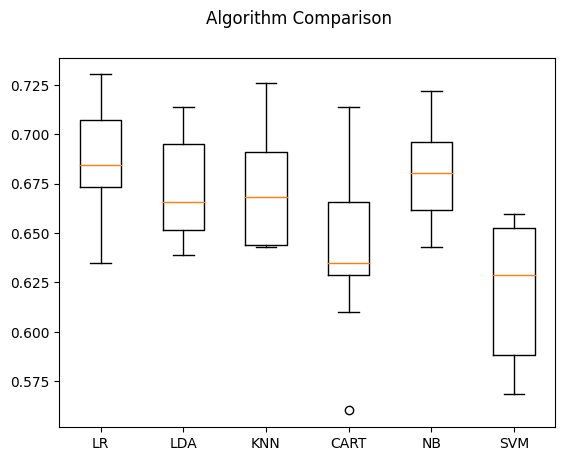

In [722]:
# Compare Algorithms
print(results)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [723]:
# Make predictions on test dataset
# instantiate learning model
cart_score = DecisionTreeClassifier()
# fitting the model
cart_score.fit(X_train, y_train)
# predict the response
predictions = cart_score.predict(X_test)
print(predictions)

['True' 'False' 'False' ... 'True' 'True' 'True']


In [724]:
print(y_test)
# evaluate accuracy
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


['False' 'False' 'False' ... 'False' 'False' 'True']
0.6576763485477178
[[1119  403]
 [ 422  466]]
              precision    recall  f1-score   support

       False       0.73      0.74      0.73      1522
        True       0.54      0.52      0.53       888

    accuracy                           0.66      2410
   macro avg       0.63      0.63      0.63      2410
weighted avg       0.66      0.66      0.66      2410



### Present - Predict Selected Game Characteristic
#### Use target charateristic to pridict sales and score
- Genre: shooter, action, sandbox
- ESRB: M
- Year: 2022
- Platform: PC, PS4, XONE

In [725]:
# Get Code
print(dict_genre[0], dict_genre[14], dict_genre[15])
print(dict_ESRB[6])
print(dict_platform[45], dict_platform[51], dict_platform[70])

Action Sandbox Shooter
M
PC PS4 XOne


In [744]:
# Create dataframe from list
genre_lst = [0, 14, 15]
ESRB_lst = [6]
pf_lst = [45, 51, 70]

# loop list to create list of formatted data
out_lst = []
for genre in genre_lst:
    for esrb in ESRB_lst:
        for pf in pf_lst:
            out_lst.append([genre, esrb, pf, 2022])

pre_df = pd.DataFrame(out_lst, columns =['Genre', 'ESRB_Rating', 'Platform', 'Year'])
pre_df_has_score = pre_df.copy()
pre_df_has_score["Avg_Score"] = 8.4
pre_df_has_score.head(20)

,Genre,ESRB_Rating,Platform,Year,Avg_Score
0,0,6,45,2022,8.4
1,0,6,51,2022,8.4
2,0,6,70,2022,8.4
3,14,6,45,2022,8.4
4,14,6,51,2022,8.4
5,14,6,70,2022,8.4
6,15,6,45,2022,8.4
7,15,6,51,2022,8.4
8,15,6,70,2022,8.4


In [745]:
pre_df_has_sale = pre_df.copy()
pre_df_has_sale["Total_Sales"] = 0.4
pre_df_has_sale.head(20)

,Genre,ESRB_Rating,Platform,Year,Total_Sales
0,0,6,45,2022,0.4
1,0,6,51,2022,0.4
2,0,6,70,2022,0.4
3,14,6,45,2022,0.4
4,14,6,51,2022,0.4
5,14,6,70,2022,0.4
6,15,6,45,2022,0.4
7,15,6,51,2022,0.4
8,15,6,70,2022,0.4


In [746]:
pre_df_has_sale2 = pre_df.copy()
pre_df_has_sale2["Total_Sales"] = 0.2
pre_df_has_sale2.head(20)

,Genre,ESRB_Rating,Platform,Year,Total_Sales
0,0,6,45,2022,0.2
1,0,6,51,2022,0.2
2,0,6,70,2022,0.2
3,14,6,45,2022,0.2
4,14,6,51,2022,0.2
5,14,6,70,2022,0.2
6,15,6,45,2022,0.2
7,15,6,51,2022,0.2
8,15,6,70,2022,0.2


In [747]:
sale_pre = cart_sale.predict(pre_df_has_score)
sale_pre


C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array(['True', 'False', 'False', 'True', 'False', 'False', 'True',
       'False', 'False'], dtype=object)

In [748]:
score_pre = cart_score.predict(pre_df_has_sale)
score_pre

C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array(['True', 'True', 'True', 'True', 'True', 'True', 'True', 'True',
       'True'], dtype=object)

In [749]:
score2_pre = cart_score.predict(pre_df_has_sale2)
score2_pre

C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array(['False', 'False', 'True', 'False', 'False', 'True', 'False',
       'False', 'True'], dtype=object)

In [750]:
# Output - human readable version
def code_converter(genre, esrb, pf):
    return dict_genre[genre], dict_ESRB[esrb], dict_platform[pf]

In [751]:
count = 0
for lst in pre_df_has_score.values:
    g, e, p = code_converter(lst[0], lst[1], lst[2])
    print("Genre: {} ESRB: {} Platform: {} Year: {} Score: {} ".format(g, e, p, lst[3], lst[4]))
    print("    Sales >= medium 0.4:", sale_pre[count])
    count+=1

    

Genre: Action ESRB: M Platform: PC Year: 2022.0 Score: 8.4 
    Sales >= medium 0.4: True
Genre: Action ESRB: M Platform: PS4 Year: 2022.0 Score: 8.4 
    Sales >= medium 0.4: False
Genre: Action ESRB: M Platform: XOne Year: 2022.0 Score: 8.4 
    Sales >= medium 0.4: False
Genre: Sandbox ESRB: M Platform: PC Year: 2022.0 Score: 8.4 
    Sales >= medium 0.4: True
Genre: Sandbox ESRB: M Platform: PS4 Year: 2022.0 Score: 8.4 
    Sales >= medium 0.4: False
Genre: Sandbox ESRB: M Platform: XOne Year: 2022.0 Score: 8.4 
    Sales >= medium 0.4: False
Genre: Shooter ESRB: M Platform: PC Year: 2022.0 Score: 8.4 
    Sales >= medium 0.4: True
Genre: Shooter ESRB: M Platform: PS4 Year: 2022.0 Score: 8.4 
    Sales >= medium 0.4: False
Genre: Shooter ESRB: M Platform: XOne Year: 2022.0 Score: 8.4 
    Sales >= medium 0.4: False


In [752]:
count = 0
for lst in pre_df_has_sale.values:
    g, e, p = code_converter(lst[0], lst[1], lst[2])
    print("Genre: {} ESRB: {} Platform: {} Year: {} Sale: {} ".format(g, e, p, lst[3], lst[4]))
    print("    Score > 8:", score_pre[count])
    count+=1

Genre: Action ESRB: M Platform: PC Year: 2022.0 Sale: 0.4 
    Score > 8: True
Genre: Action ESRB: M Platform: PS4 Year: 2022.0 Sale: 0.4 
    Score > 8: True
Genre: Action ESRB: M Platform: XOne Year: 2022.0 Sale: 0.4 
    Score > 8: True
Genre: Sandbox ESRB: M Platform: PC Year: 2022.0 Sale: 0.4 
    Score > 8: True
Genre: Sandbox ESRB: M Platform: PS4 Year: 2022.0 Sale: 0.4 
    Score > 8: True
Genre: Sandbox ESRB: M Platform: XOne Year: 2022.0 Sale: 0.4 
    Score > 8: True
Genre: Shooter ESRB: M Platform: PC Year: 2022.0 Sale: 0.4 
    Score > 8: True
Genre: Shooter ESRB: M Platform: PS4 Year: 2022.0 Sale: 0.4 
    Score > 8: True
Genre: Shooter ESRB: M Platform: XOne Year: 2022.0 Sale: 0.4 
    Score > 8: True


In [753]:
count = 0
for lst in pre_df_has_sale2.values:
    g, e, p = code_converter(lst[0], lst[1], lst[2])
    print("Genre: {} ESRB: {} Platform: {} Year: {} Sale: {} ".format(g, e, p, lst[3], lst[4]))
    print("    Score > 8:", score2_pre[count])
    count+=1

Genre: Action ESRB: M Platform: PC Year: 2022.0 Sale: 0.2 
    Score > 8: False
Genre: Action ESRB: M Platform: PS4 Year: 2022.0 Sale: 0.2 
    Score > 8: False
Genre: Action ESRB: M Platform: XOne Year: 2022.0 Sale: 0.2 
    Score > 8: True
Genre: Sandbox ESRB: M Platform: PC Year: 2022.0 Sale: 0.2 
    Score > 8: False
Genre: Sandbox ESRB: M Platform: PS4 Year: 2022.0 Sale: 0.2 
    Score > 8: False
Genre: Sandbox ESRB: M Platform: XOne Year: 2022.0 Sale: 0.2 
    Score > 8: True
Genre: Shooter ESRB: M Platform: PC Year: 2022.0 Sale: 0.2 
    Score > 8: False
Genre: Shooter ESRB: M Platform: PS4 Year: 2022.0 Sale: 0.2 
    Score > 8: False
Genre: Shooter ESRB: M Platform: XOne Year: 2022.0 Sale: 0.2 
    Score > 8: True
